    Bellman Ford algorithm helps us find the shortest path from a vertex to all other vertices of a weighted graph. It is similar to Dijkstra's algorithm but it can work with graphs in which edges can have negative weights.
    
    
    Negative weight edges can create negative weight cycles i.e. a cycle that will reduce the total path distance by coming back to the same point.
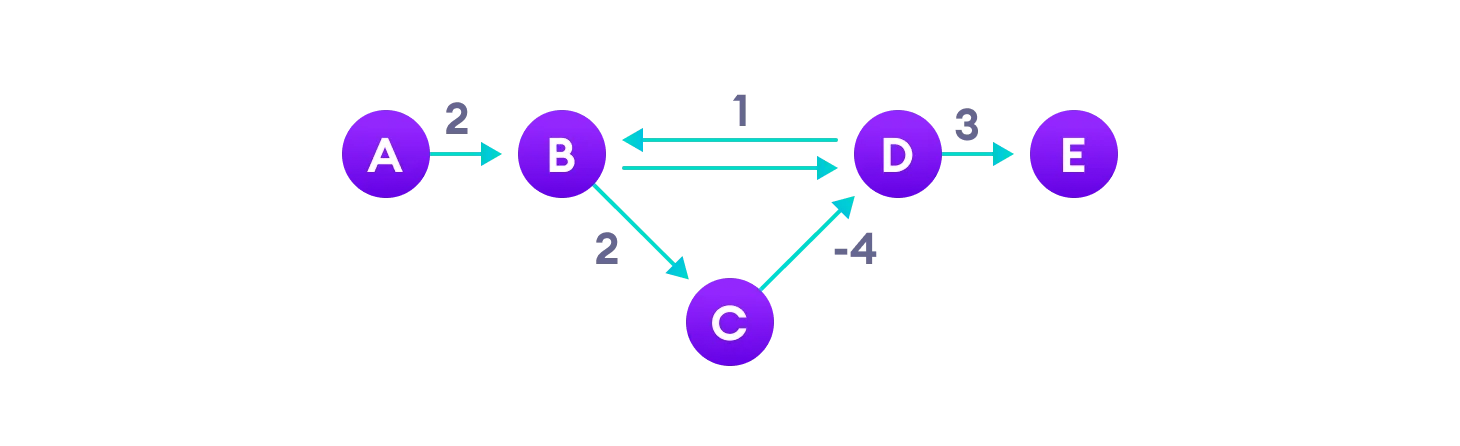

    We’re considering each node as a city. We want to go to city R from city M.
    There are three roads from the city M to reach the city R: MNPR, MNQPR, MNOPR. The road lengths are 5, 2, and 8.
    But, when we take a deeper look, we see that there’s a negative cycle: NQP, which has a length of -1. So, each time we cover the path NQP, our road length will decrease.

    This leads to us not being able to get an exact answer on the shortest path since repeating the road NQP infinite times would, by definition, be the least expensive route.
    
    Negative weight cycles can give an incorrect result when trying to find out the shortest path
    Shortest path algorithms like Dijkstra's Algorithm that aren't able to detect such a cycle can give an incorrect result because they can go through a negative weight cycle and reduce the path length.

    Bellman Ford algorithm works by overestimating the length of the path from the starting vertex to all other vertices. Then it iteratively relaxes those estimates by finding new paths that are shorter than the previously overestimated paths.
    
    

    function bellmanFord(G, S) : S -> starting point, G -> graph
      for each vertex V in G
        distance[V] <- infinite
          previous[V] <- NULL
      distance[S] <- 0

      for each vertex V in G				
        for each edge (U,V) in G
          if distance[U] + edge_weight(U, V) < distance[V]
            distance[V] <- distance[U] + edge_weight(U, V)

      for each edge (U,V) in G
        If distance[U] + edge_weight(U, V) < distance[V}
          Error: Negative Cycle Exists

      return distance[]

A graph without negative cycle 

Weights between nodes


Assume that S is our starting vertex. We’re now ready to start with the initialization step of the algorithm:
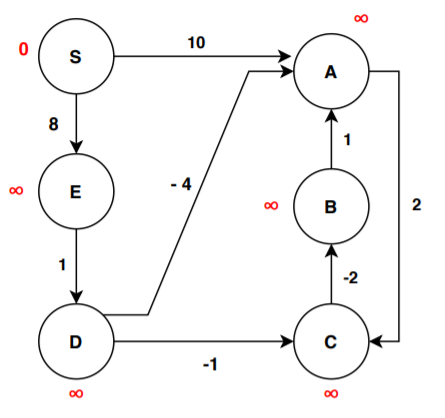

The values in red denote the distances. As we discussed, the distance from the starting node to the starting node is 0. The distance of all other vertices is infinite for the initialization step.

We’ve six vertices here. So, the algorithm will run five iterations for finding the shortest path and one iteration for finding a negative cycle if there exists any.

After first iteration (iteration order > S, A, B, C, D, E):


After second iteration (new ways > from D to A and from D to C): 
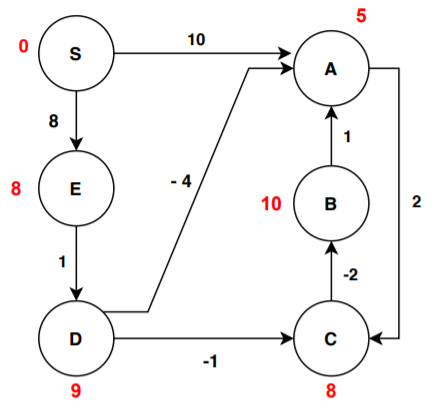

After third iteration (new ways > from A to C and from C to B): 


After fourth iteration (no new way, that means we can stop iterating and this is the final result)
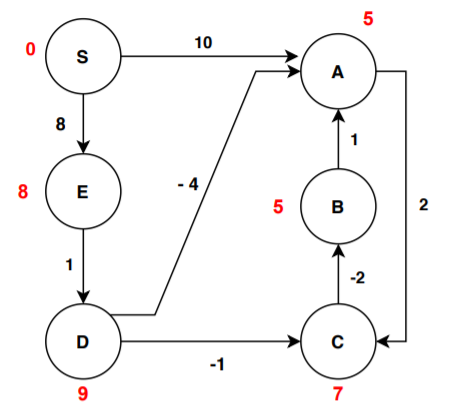

    In general (|V| - 1) is the highest number of iterations that we need to run in case the distance values of the consecutive iterations are not stable. 

A graph with negative cycle 

Weights between nodes 
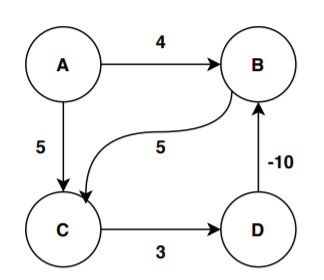

    The graph has 4 vertices. We’re considering the vertex A as the starting vertex here. The algorithm expects to iterate 3 times for calculation of shortest distance and one more time to check for the negative cycle. The edge order we’re going to follow here is: (D, C, A, B)

Initializing the graph


After first iteration
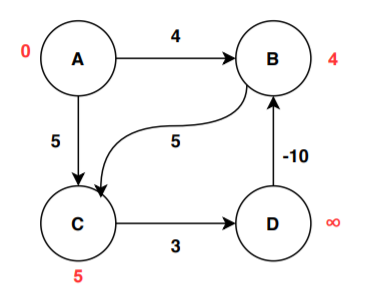

After second iteration
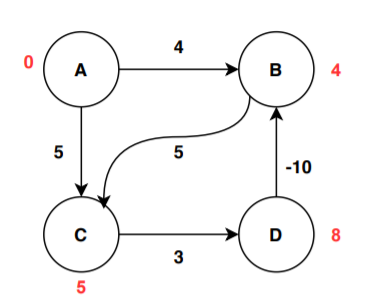

After third iteration


We’re done with the maximum required iterations. Now let’s iterate one last time to decide whether the graph has a negative cycle or not: 
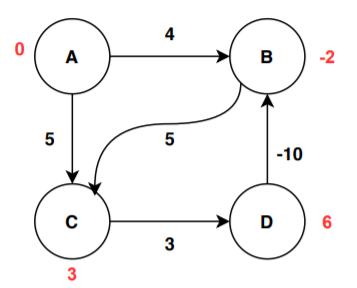

    We can see there is a change in value for vertex D. The change happens as the algorithm relax the edge (C, D). The distance values are not stable even after the maximum number of iterations. Therefore, in this case, the algorithms return that the graph contains a negative weighted cycle, and hence it is not possible to calculate the shortest path from the starting vertex to all other vertices in the given graph.
    
    Normally after V - 1 iteration, we should have found all shortest paths. If there are still shorter paths, that shows there is a negative cycle in the graph.

The complexity to do all the operations takes O(VE) time. In total, the time complexity of the Bellman-Ford algorithm is O(VE).


In [2]:
#Python implementation

#start : vertex(int), graph : {vertex(int): edges( { edge(int): weight(int) } ) }
def bellmanFord(start, graph): 
    distances = {i: float("inf") for i in graph.keys()}
    distances[start] = 0
    
    for curr_vertex in graph: 
        edges = graph[curr_vertex]
        for edge in edges: 
            distance = edges[edge]
            if distances[edge] > distances[curr_vertex] + distance: 
                distances[edge] = distances[curr_vertex] + distance
    
    for vertex in graph:
        for edge in graph[vertex]: 
            if distances[edge] > distances[curr_vertex] + graph[vertex][edge]:
                print("Negative cycle exists")
                return False
    
    return distances

Bellman Ford faster implementation(c++) 

    const int INF = 1000000000;
    vector<vector<pair<int, int>>> adj;

    bool spfa(int s, vector<int>& d) {
        int n = adj.size();
        d.assign(n, INF);
        vector<int> cnt(n, 0);
        vector<bool> inqueue(n, false);
        queue<int> q;

        d[s] = 0;
        q.push(s);
        inqueue[s] = true;
        while (!q.empty()) {
            int v = q.front();
            q.pop();
            inqueue[v] = false;

            for (auto edge : adj[v]) {
                int to = edge.first;
                int len = edge.second;

                if (d[v] + len < d[to]) {
                    d[to] = d[v] + len;
                    if (!inqueue[to]) {
                        q.push(to);
                        inqueue[to] = true;
                        cnt[to]++;
                        if (cnt[to] > n)
                            return false;  // negative cycle
                    }
                }
            }
        }
        return true;
    }